In [8]:
import os
print(os.getcwd())

d:\HW Year 2\BIC\BIC_Coursework\experiments


# Step 1: Test ANN Forward Pass

In [3]:
import os, sys
sys.path.append(os.path.abspath(".."))

In [4]:
import numpy as np
from ann.network import ANN
from coupling.utils import flatten_params, unflatten_params

In [5]:
# Small ANN with 8 inputs, 16 hidden (ReLU), 1 output (linear)
net = ANN([8, 16, 1], ["relu", "linear"], seed=0)

# Generate a random input sample
x = np.random.rand(8, 1)

# Forward pass
y = net.forward(x)

print("Output shape:", y.shape)
print("Output value:", y.item())


Output shape: (1, 1)
Output value: 0.06956919662701772


In [6]:
# Visualise activations at each layer
def forward_visual(net, x):
    a = x
    for i, (W, b, act_name) in enumerate(zip(net.weights, net.biases, net.activations)):
        z = W @ a + b
        a = net.act(z, act_name)
        print(f"Layer {i+1} ({act_name}) output range: [{a.min():.4f}, {a.max():.4f}]")
    return a

forward_visual(net, x)

Layer 1 (relu) output range: [0.0000, 0.3594]
Layer 2 (linear) output range: [0.0696, 0.0696]


array([[0.0695692]])

# Step 2: Load Dataset

In [9]:
from experiments.data_utils import load_concrete

Xtr, ytr, Xte, yte, (x_mean, x_std), _ = load_concrete("../data/concrete.csv", test_ratio=0.3, seed=0)
print("Train:", Xtr.shape, ytr.shape)
print("Test :", Xte.shape, yte.shape)


Train: (721, 8) (721, 1)
Test : (309, 8) (309, 1)


In [10]:
import numpy as np
print("Train mean ~0:", np.round(Xtr.mean(axis=0), 4))
print("Train std  ~1:", np.round(Xtr.std(axis=0), 4))

Train mean ~0: [-0.  0.  0.  0. -0. -0.  0. -0.]
Train std  ~1: [1. 1. 1. 1. 1. 1. 1. 1.]


# Step 3: Random Weights Baseline MAE

In [11]:
from ann.network import ANN
from experiments.predict import predict_batch
from experiments.metrics import mae

net = ANN([8, 16, 1], ["relu", "linear"], seed=0)  # simple regression net
y_pred = predict_batch(net, Xte)
print("Random-weights Test MAE:", mae(yte, y_pred))

Random-weights Test MAE: 34.86211828854752


Matplotlib is building the font cache; this may take a moment.


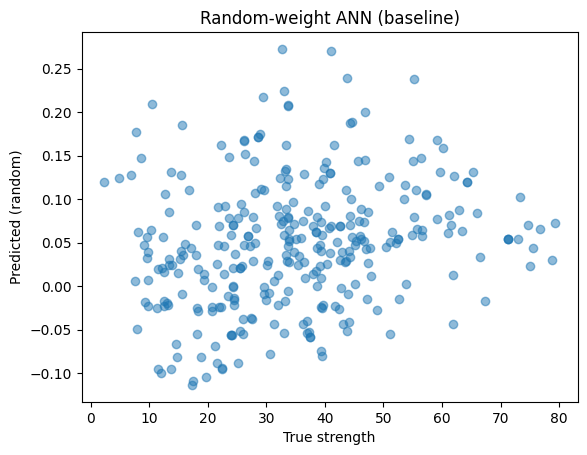

In [12]:
import matplotlib.pyplot as plt

# Scatter plot of true vs predicted
plt.scatter(yte, y_pred, alpha=0.5)
plt.xlabel("True strength"); plt.ylabel("Predicted (random)")
plt.title("Random-weight ANN (baseline)"); plt.show()
